# IMPORT LIBARY

In [431]:
import pandas as pd
import re

import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# DATA PREPROCESSING

In [432]:
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from textblob import TextBlob
#import nltk
#nltk.download('vader_lexicon')
# data preprocessing
#def preprocess_tweet(sen):
    #Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    #in lowercase'''
    #sentence = sen.lower()

    # Remove RT
    #sentence = re.sub('RT @\w+: '," ", sentence)

    # Remove special characters
    #sentence = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", sentence)

    # Single character removal
    #sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    #sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    #return sentence

In [433]:
#cleaned_tweets = []

#for tweet in tweet_list_df['text']:
  #cleaned_tweet = preprocess_tweet(tweet)
  #cleaned_tweets.append(cleaned_tweet)

In [434]:
#tweet_list_df['cleaned'] = pd.DataFrame(cleaned_tweets)
#tweet_list_df.head(5)

# LABELING USING POLARITY

In [435]:
#POLARITAS 
#Calculating Negative, Positive, Neutral and Compound values

#tweet_list_df[['polarity', 'subjectivity']] = tweet_list_df['cleaned'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
#for index, row in tweet_list_df['cleaned'].iteritems():
   # score = SentimentIntensityAnalyzer().polarity_scores(row)
    #neg = score['neg']
    #neu = score['neu']
    #pos = score['pos']
    #comp = score['compound']
    #if comp <= -0.05:
        #tweet_list_df.loc[index, 'sentiment'] = "negative"
    #elif comp >= 0.05:
        #tweet_list_df.loc[index, 'sentiment'] = "positive"
    #else:
        #tweet_list_df.loc[index, 'sentiment'] = "neutral"
    #tweet_list_df.loc[index, 'neg'] = neg
    #tweet_list_df.loc[index, 'neu'] = neu
    #tweet_list_df.loc[index, 'pos'] = pos
    #tweet_list_df.loc[index, 'compound'] = comp

#tweet_list_df.head(5)

# READ DATA

In [436]:
#READ DATA PREPROCESSING
import pandas as pd

In [437]:
df = pd.read_csv('/kaggle/input/sentimenapple/c2_sentimentanalysis_output.csv',sep=',')
df

/tmp/ipykernel_34/2435812810.py:1: DtypeWarning: Columns (0,1,2,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/sentimenapple/c2_sentimentanalysis_output.csv',sep=',')


,Unnamed: 0,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count
0,0,#Apple is eyeing a September 7 launch date for...,apple is eyeing september 7 launch date for i...,0.136364,0.454545,neutral,0.000,1.000,0.000,0.0000,63.0,12.0
1,1,The latest Apple Watch Daily News! https://t.c...,the latest apple watch daily news applewatch a...,0.250000,0.45,neutral,0.000,1.000,0.000,0.0000,50.0,8.0
2,2,C$19.99 - #FreeShipping | Super sale means sup...,c 19 99 freeshipping super sale means super sa...,0.183333,0.333333,positive,0.000,0.762,0.238,0.8316,189.0,28.0
3,3,Vietnam to make Apple Watch and MacBook for fi...,vietnam to make apple watch and macbook for fi...,0.375000,0.416667,neutral,0.000,1.000,0.000,0.0000,144.0,23.0
4,4,When you need to write Unit Tests but long wee...,when you need to write unit tests but long wee...,-0.050000,0.4,positive,0.000,0.776,0.224,0.7351,98.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...
131612,995,C$43.93 - #FreeShipping | Amazing deals at ama...,c 43 93 freeshipping amazing deals at amazing ...,0.400000,0.7000000000000001,positive,0.062,0.712,0.226,0.7579,188.0,29.0
131613,996,Airtel Very Close to Reaching 1000 Cities with...,airtel very close to reaching 1000 cities with...,0.200000,0.3,positive,0.000,0.892,0.108,0.4814,226.0,36.0
131614,997,ExpressVPN: A Popular But Expensive Alternativ...,expressvpn popular but expensive alternative n...,0.125000,0.64375,positive,0.078,0.751,0.171,0.3291,240.0,31.0
131615,998,Shout out to my peers at @acoreunion who joine...,shout out to my peers at who joined me in our ...,0.287500,0.575,positive,0.000,0.912,0.088,0.4767,167.0,34.0


In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131617 entries, 0 to 131616
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       66081 non-null  object 
 1   text             66081 non-null  object 
 2   cleaned          1000 non-null   object 
 3   polarity         1000 non-null   float64
 4   subjectivity     1000 non-null   object 
 5   sentiment        1000 non-null   object 
 6   neg              1000 non-null   float64
 7   neu              1000 non-null   float64
 8   pos              1000 non-null   float64
 9   compound         1000 non-null   float64
 10  text_len         1000 non-null   float64
 11  text_word_count  999 non-null    float64
dtypes: float64(7), object(5)
memory usage: 12.1+ MB


In [439]:
df.isna().sum()

Unnamed: 0          65536
text                65536
cleaned            130617
polarity           130617
subjectivity       130617
sentiment          130617
neg                130617
neu                130617
pos                130617
compound           130617
text_len           130617
text_word_count    130618
dtype: int64

In [440]:
df.duplicated().sum()

130615

In [441]:
df = df.drop("Unnamed: 0",axis=1)
df

,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count
0,#Apple is eyeing a September 7 launch date for...,apple is eyeing september 7 launch date for i...,0.136364,0.454545,neutral,0.000,1.000,0.000,0.0000,63.0,12.0
1,The latest Apple Watch Daily News! https://t.c...,the latest apple watch daily news applewatch a...,0.250000,0.45,neutral,0.000,1.000,0.000,0.0000,50.0,8.0
2,C$19.99 - #FreeShipping | Super sale means sup...,c 19 99 freeshipping super sale means super sa...,0.183333,0.333333,positive,0.000,0.762,0.238,0.8316,189.0,28.0
3,Vietnam to make Apple Watch and MacBook for fi...,vietnam to make apple watch and macbook for fi...,0.375000,0.416667,neutral,0.000,1.000,0.000,0.0000,144.0,23.0
4,When you need to write Unit Tests but long wee...,when you need to write unit tests but long wee...,-0.050000,0.4,positive,0.000,0.776,0.224,0.7351,98.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...
131612,C$43.93 - #FreeShipping | Amazing deals at ama...,c 43 93 freeshipping amazing deals at amazing ...,0.400000,0.7000000000000001,positive,0.062,0.712,0.226,0.7579,188.0,29.0
131613,Airtel Very Close to Reaching 1000 Cities with...,airtel very close to reaching 1000 cities with...,0.200000,0.3,positive,0.000,0.892,0.108,0.4814,226.0,36.0
131614,ExpressVPN: A Popular But Expensive Alternativ...,expressvpn popular but expensive alternative n...,0.125000,0.64375,positive,0.078,0.751,0.171,0.3291,240.0,31.0
131615,Shout out to my peers at @acoreunion who joine...,shout out to my peers at who joined me in our ...,0.287500,0.575,positive,0.000,0.912,0.088,0.4767,167.0,34.0


In [442]:
df.isna().sum()

text                65536
cleaned            130617
polarity           130617
subjectivity       130617
sentiment          130617
neg                130617
neu                130617
pos                130617
compound           130617
text_len           130617
text_word_count    130618
dtype: int64

In [443]:
df.dropna(axis=1)
df

,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count
0,#Apple is eyeing a September 7 launch date for...,apple is eyeing september 7 launch date for i...,0.136364,0.454545,neutral,0.000,1.000,0.000,0.0000,63.0,12.0
1,The latest Apple Watch Daily News! https://t.c...,the latest apple watch daily news applewatch a...,0.250000,0.45,neutral,0.000,1.000,0.000,0.0000,50.0,8.0
2,C$19.99 - #FreeShipping | Super sale means sup...,c 19 99 freeshipping super sale means super sa...,0.183333,0.333333,positive,0.000,0.762,0.238,0.8316,189.0,28.0
3,Vietnam to make Apple Watch and MacBook for fi...,vietnam to make apple watch and macbook for fi...,0.375000,0.416667,neutral,0.000,1.000,0.000,0.0000,144.0,23.0
4,When you need to write Unit Tests but long wee...,when you need to write unit tests but long wee...,-0.050000,0.4,positive,0.000,0.776,0.224,0.7351,98.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...
131612,C$43.93 - #FreeShipping | Amazing deals at ama...,c 43 93 freeshipping amazing deals at amazing ...,0.400000,0.7000000000000001,positive,0.062,0.712,0.226,0.7579,188.0,29.0
131613,Airtel Very Close to Reaching 1000 Cities with...,airtel very close to reaching 1000 cities with...,0.200000,0.3,positive,0.000,0.892,0.108,0.4814,226.0,36.0
131614,ExpressVPN: A Popular But Expensive Alternativ...,expressvpn popular but expensive alternative n...,0.125000,0.64375,positive,0.078,0.751,0.171,0.3291,240.0,31.0
131615,Shout out to my peers at @acoreunion who joine...,shout out to my peers at who joined me in our ...,0.287500,0.575,positive,0.000,0.912,0.088,0.4767,167.0,34.0


In [444]:
df.isna().sum()

text                65536
cleaned            130617
polarity           130617
subjectivity       130617
sentiment          130617
neg                130617
neu                130617
pos                130617
compound           130617
text_len           130617
text_word_count    130618
dtype: int64

In [445]:
df.sentiment.dropna()
df.sentiment.value_counts()

positive    445
neutral     387
negative    167
0.0           1
Name: sentiment, dtype: int64

In [446]:
# Mengganti nilai 0.0 dengan NaN pada kolom 'B'
df.loc[df['sentiment'] == 0.0, 'sentiment'] = pd.np.nan

# Menghapus baris yang berisi NaN
df = df.dropna()

# Menampilkan dataframe yang sudah dihapus nilai 0.0
print(df)

                                                     text  \
0       #Apple is eyeing a September 7 launch date for...   
1       The latest Apple Watch Daily News! https://t.c...   
2       C$19.99 - #FreeShipping | Super sale means sup...   
3       Vietnam to make Apple Watch and MacBook for fi...   
4       When you need to write Unit Tests but long wee...   
...                                                   ...   
131612  C$43.93 - #FreeShipping | Amazing deals at ama...   
131613  Airtel Very Close to Reaching 1000 Cities with...   
131614  ExpressVPN: A Popular But Expensive Alternativ...   
131615  Shout out to my peers at @acoreunion who joine...   
131616  RT TheHackersNews "#Apple releases security up...   

                                                  cleaned  polarity  \
0        apple is eyeing september 7 launch date for i...  0.136364   
1       the latest apple watch daily news applewatch a...  0.250000   
2       c 19 99 freeshipping super sale means super sa

/tmp/ipykernel_34/324417875.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df.loc[df['sentiment'] == 0.0, 'sentiment'] = pd.np.nan


In [447]:
df.sentiment.value_counts()

positive    445
neutral     387
negative    167
Name: sentiment, dtype: int64

# EXPLORATORY DATA ANALYSIS

In [448]:
df.isna().sum()

text               0
cleaned            0
polarity           0
subjectivity       0
sentiment          0
neg                0
neu                0
pos                0
compound           0
text_len           0
text_word_count    0
dtype: int64

In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 131616
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   text             999 non-null    object 
 1   cleaned          999 non-null    object 
 2   polarity         999 non-null    float64
 3   subjectivity     999 non-null    object 
 4   sentiment        999 non-null    object 
 5   neg              999 non-null    float64
 6   neu              999 non-null    float64
 7   pos              999 non-null    float64
 8   compound         999 non-null    float64
 9   text_len         999 non-null    float64
 10  text_word_count  999 non-null    float64
dtypes: float64(7), object(4)
memory usage: 93.7+ KB


In [450]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tweet_list_df_negative = df[df["sentiment"]=="negative"]
tweet_list_df_positive = df[df["sentiment"]=="positive"]
tweet_list_df_neutral = df[df["sentiment"]=="neutral"]

In [451]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [452]:
#Count_values for sentiment
count_values_in_column(df,"sentiment")

,Total,Percentage
positive,445,44.54
neutral,387,38.74
negative,167,16.72


In [453]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [454]:
#Count_values for sentiment
count_values_in_column(df,"sentiment")

,Total,Percentage
positive,445,44.54
neutral,387,38.74
negative,167,16.72


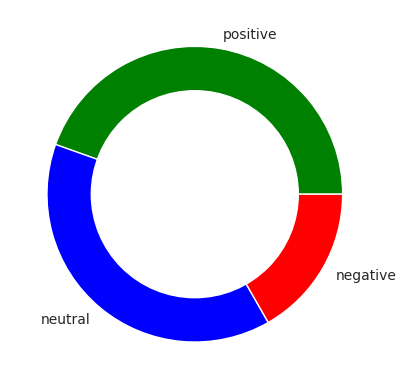

In [455]:
# create data for Pie Chart
pichart = count_values_in_column(df,"sentiment")
# names= pc.index
# size=pc["Percentage"]

names= pichart.index
size=pichart["Percentage"]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [456]:
# persentase yang churn sama yang tidak churn
class_counts = df.sentiment.value_counts()
class_percentanges = class_counts / df.shape[0] * 100
print(class_percentanges)

positive    44.544545
neutral     38.738739
negative    16.716717
Name: sentiment, dtype: float64


# WORD CLOUD

In [457]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("./a1_inputs/cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=100,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("c1_wordcloud.png")
    print("Word Cloud Saved Successfully")
    path="c1_wordcloud.png"
    display(Image.open(path))

In [458]:
# Creating wordcloud for all tweets

#create_wordcloud(df["cleaned"].values)
# create_wordcloud(tweet_list_df_positive["text"].values)
# create_wordcloud(tweet_list_df_negative["cleaned"].values)
# create_wordcloud(tweet_list_df_neutral["text"].values)

# DATA PREP

# ENCODED SENTIMEN

In [459]:
df.sentiment

0          neutral
1          neutral
2         positive
3          neutral
4         positive
            ...   
131612    positive
131613    positive
131614    positive
131615    positive
131616    negative
Name: sentiment, Length: 999, dtype: object

In [460]:
df['sentiment'] = df['sentiment'].map({'negative':0, 'neutral':1,'positive':2})

/tmp/ipykernel_34/3120371232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['sentiment'].map({'negative':0, 'neutral':1,'positive':2})


In [461]:
categorical = ['text','cleaned']
numerical = []

In [462]:
target = ['sentiment']

In [463]:
numerical = [x for x in df.columns if x not in categorical]
numerical

['polarity',
 'subjectivity',
 'sentiment',
 'neg',
 'neu',
 'pos',
 'compound',
 'text_len',
 'text_word_count']

In [464]:
df_num = df[numerical]
df_num

,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count
0,0.136364,0.454545,1,0.000,1.000,0.000,0.0000,63.0,12.0
1,0.250000,0.45,1,0.000,1.000,0.000,0.0000,50.0,8.0
2,0.183333,0.333333,2,0.000,0.762,0.238,0.8316,189.0,28.0
3,0.375000,0.416667,1,0.000,1.000,0.000,0.0000,144.0,23.0
4,-0.050000,0.4,2,0.000,0.776,0.224,0.7351,98.0,19.0
...,...,...,...,...,...,...,...,...,...
131612,0.400000,0.7000000000000001,2,0.062,0.712,0.226,0.7579,188.0,29.0
131613,0.200000,0.3,2,0.000,0.892,0.108,0.4814,226.0,36.0
131614,0.125000,0.64375,2,0.078,0.751,0.171,0.3291,240.0,31.0
131615,0.287500,0.575,2,0.000,0.912,0.088,0.4767,167.0,34.0


# CLASSIFICATION MULTICLASS

# # Multiclass Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      0.98      0.99       116
           2       0.99      1.00      0.99       132

    accuracy                           0.99       300
   macro avg       1.00      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



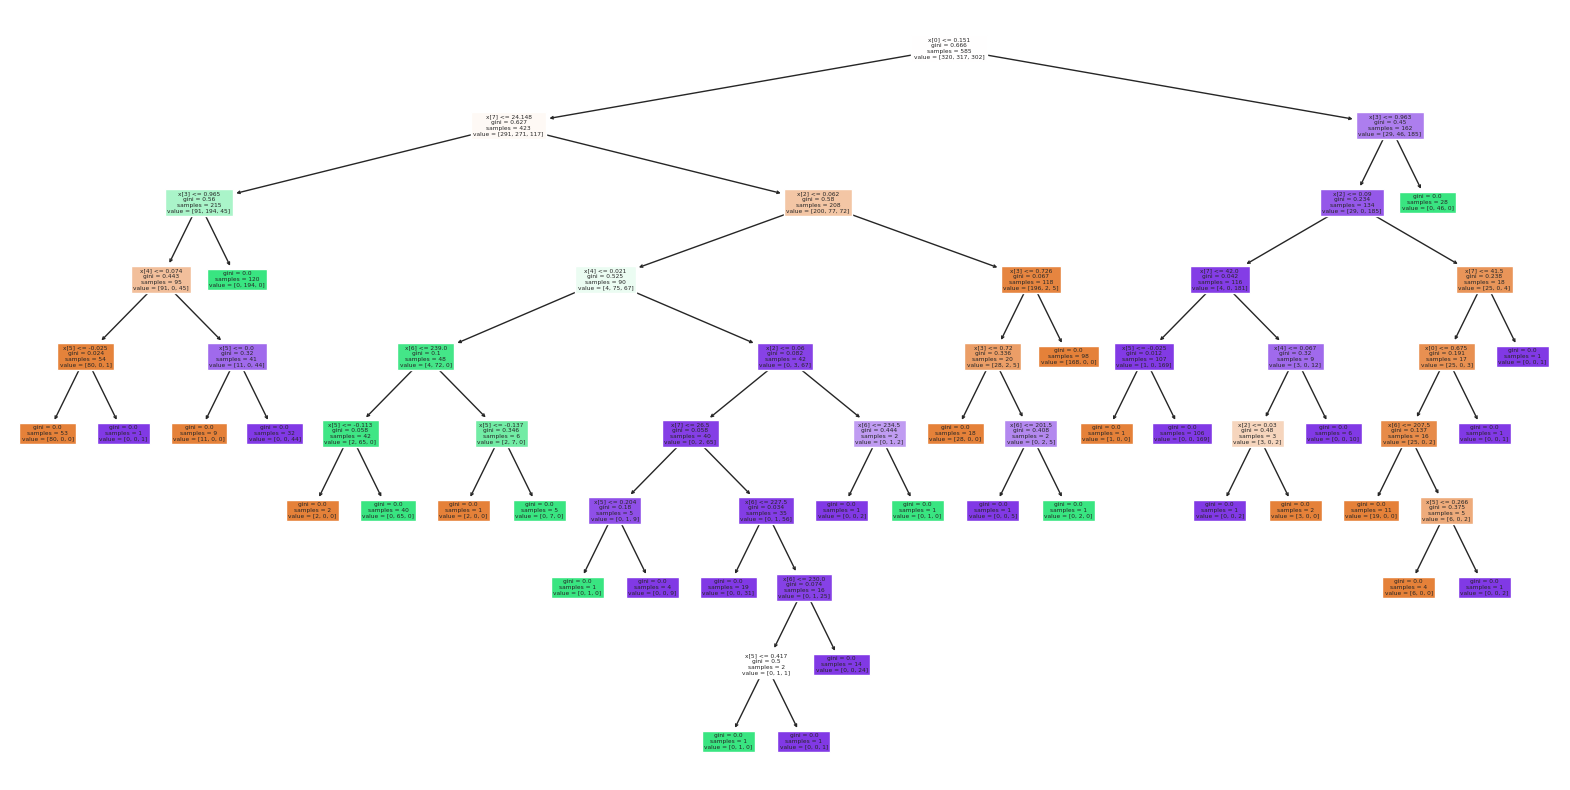

In [467]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# define features and target
X = df_num.drop('sentiment', axis=1)
y = df_num['sentiment']

# split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# define pipeline
pipeline = Pipeline([
    ('smote', SMOTE()),
    ('clf', RandomForestClassifier(n_estimators=100))
])

# fit pipeline to train data
pipeline.fit(X_train, y_train)

# predict on test data
y_pred = pipeline.predict(X_test)

# evaluate performance
print(classification_report(y_test, y_pred))

# plot the first tree from the random forest
plt.figure(figsize=(20,10))
plot_tree(pipeline['clf'].estimators_[0], filled=True)
plt.show()

In [468]:
print(confusion_matrix)

<function confusion_matrix at 0x7c014021cb80>


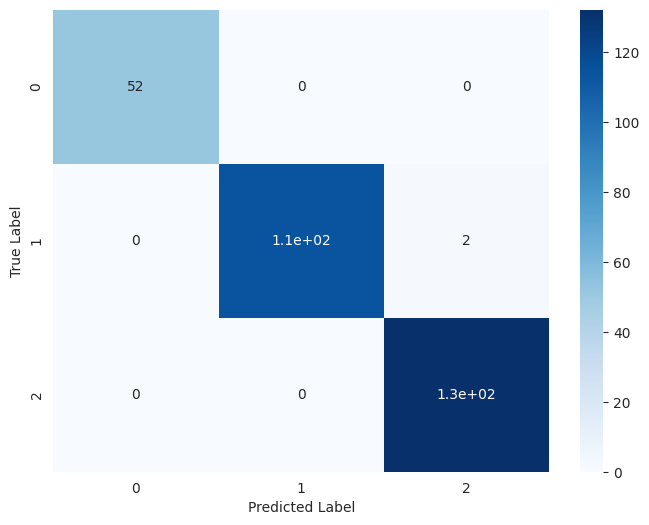

In [469]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the predicted labels and true labels stored in variables 'y_pred' and 'y_true' respectively

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [471]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      0.98      0.99       116
           2       0.99      1.00      0.99       132

    accuracy                           0.99       300
   macro avg       1.00      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [472]:
feature_scores = pd.Series(pipeline['clf'].feature_importances_, index=X_train.columns).sort_values(ascending = False)
feature_scores

compound           0.346556
neu                0.233843
neg                0.192558
pos                0.156091
polarity           0.034571
subjectivity       0.017235
text_word_count    0.010316
text_len           0.008828
dtype: float64

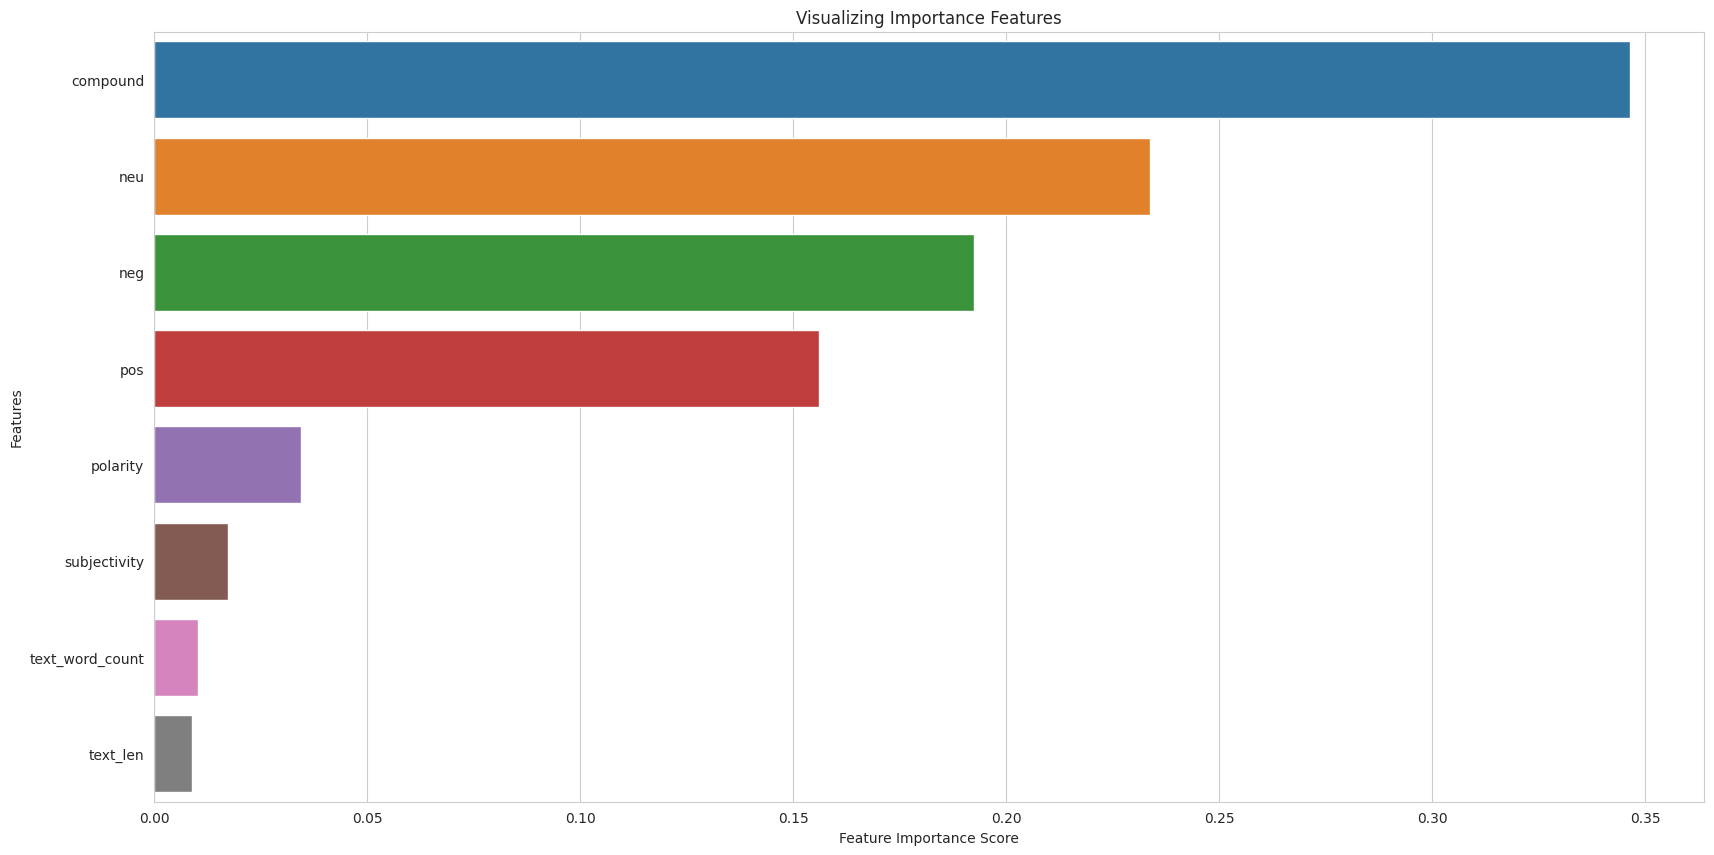

In [473]:
import seaborn as sns  

sns.set_style('whitegrid')
plt.figure(figsize=(20, 10))
sns.barplot(x=feature_scores, y=feature_scores.index, dodge=False)


# add labels to the graph 

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph  
plt.title('Visualizing Importance Features')
plt.show()